In [2]:
# mounting the drive to get the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing libraries
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# This piece of code was actually executed in VSCode. This methods does not run in colab
# For evaluation purpose I have pasted the code here.

# This code is used for selecting the road using mouse.

is_drawing = False
custom_points = []

def draw_shape(event, x, y, flags, params):
    global is_drawing, custom_points

    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        custom_points = [(x, y)]

    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        custom_points.append((x, y))
        cv2.polylines(img, [np.array(custom_points)], isClosed=True, color=(255, 0, 0), thickness=2)
        roi = extract_region(img, [np.array(custom_points)])
        apply_custom_threshold(roi)

    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            custom_points.append((x, y))

def extract_region(image, vertices):
    # Create a white mask with the same size as the image
    mask = np.ones_like(image) * 255
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def apply_custom_threshold(region_of_interest):
    grayscale = cv2.cvtColor(region_of_interest, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(grayscale, 9, 255, cv2.THRESH_BINARY)

    # Display the modified result
    cv2.namedWindow('Modified Result', cv2.WINDOW_NORMAL)
    cv2.imshow('Modified Result', binary_mask)
    cv2.imwrite('D:/IIITB/2nd_sem/VR/VR_graded/Assignment1/binary_mask1_new.jpg',binary_mask)

# Load the image
img = cv2.imread('D:/IIITB/2nd_sem/VR/VR_graded/Assignment1/ShadowRemoval1.jpg')

# Create a window and set the callback function
cv2.namedWindow('Select Polygon ROI',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('Select Polygon ROI', draw_shape)

while True:
    cv2.imshow('Select Polygon ROI', img)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Press 'Esc' to exit
        break

# cv2.imshow('Selected Polygon ROI', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# getting the dataset(csv file) and converting into pandas dataframe
path_link = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/ShadowRemoval1.jpg"

# LOAD AN IMAGE USING 'IMREAD'
img = cv.imread(path_link)

cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
# getting the dataset(csv file) and converting into pandas dataframe
path_link_binary_mask1 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/binary_mask1_new.jpg"

# LOAD AN IMAGE USING 'IMREAD'
img_binary_mask1 = cv.imread(path_link_binary_mask1)

cv2_imshow(img_binary_mask1)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# 173, 160, 149
# 168, 153, 136
# 121, 116, 110
# 201, 193, 176
# 171, 161, 149 best
height, width, channel = img.shape

result_image = img.copy()
for i in range(height):
    for j in range(width):
        if img_binary_mask1[i,j].sum() == 0:
            result_image[i,j] = [149 , 161, 171]

# cv2_imshow(img)
cv2_imshow(result_image)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# getting the dataset(csv file) and converting into pandas dataframe
path_link_test = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/ShadowRemoval2.jpg"

# LOAD AN IMAGE USING 'IMREAD'
img_test = cv.imread(path_link_test)

cv2_imshow(img_test)

Output hidden; open in https://colab.research.google.com to view.

In [13]:

# getting the dataset(csv file) and converting into pandas dataframe
path_link_binary_mask2 = "/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/binary_mask2_new.jpg"

# LOAD AN IMAGE USING 'IMREAD'
img_binary_mask2 = cv.imread(path_link_binary_mask2)

cv2_imshow(img_binary_mask2)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# 207, 200, 192
height, width, channel = img_test.shape

result_image_test = img_test.copy()
for i in range(height):
    for j in range(width):
        if img_binary_mask2[i,j].sum() == 0:
            result_image_test[i,j] = [192 , 200, 207]

cv2_imshow(result_image_test)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
cv.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_1/train_shadow_remove.jpg",result_image)

True

In [18]:
cv.imwrite("/content/drive/MyDrive/Colab_Notebooks/IIITB_VR/Assignment_1/test_shadow_remove.jpg",result_image_test)

True

From Here All the experiments that was done previously was given.

In [ ]:
def Lab_Segmentation(image):
    lowerRange= np.array([45, 30, 15] , dtype="uint8")
    upperRange= np.array([140, 140, 137], dtype="uint8")
    # lowerRange= np.array([35, 0, 0] , dtype="uint8")
    # upperRange= np.array([130, 200, 200], dtype="uint8")
    mask = image[:].copy()

    imageLab = cv.cvtColor(image, cv.COLOR_BGR2Lab)
    imageRange = cv.inRange(imageLab,lowerRange, upperRange)

    mask[:,:,0] = imageRange
    mask[:,:,1] = imageRange
    mask[:,:,2] = imageRange

    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
    closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    faceLab = cv.bitwise_and(image,mask)

    return faceLab

masked_image_lab = Lab_Segmentation(whitebalanced)
cv2_imshow(masked_image_lab)

Output hidden; open in https://colab.research.google.com to view.

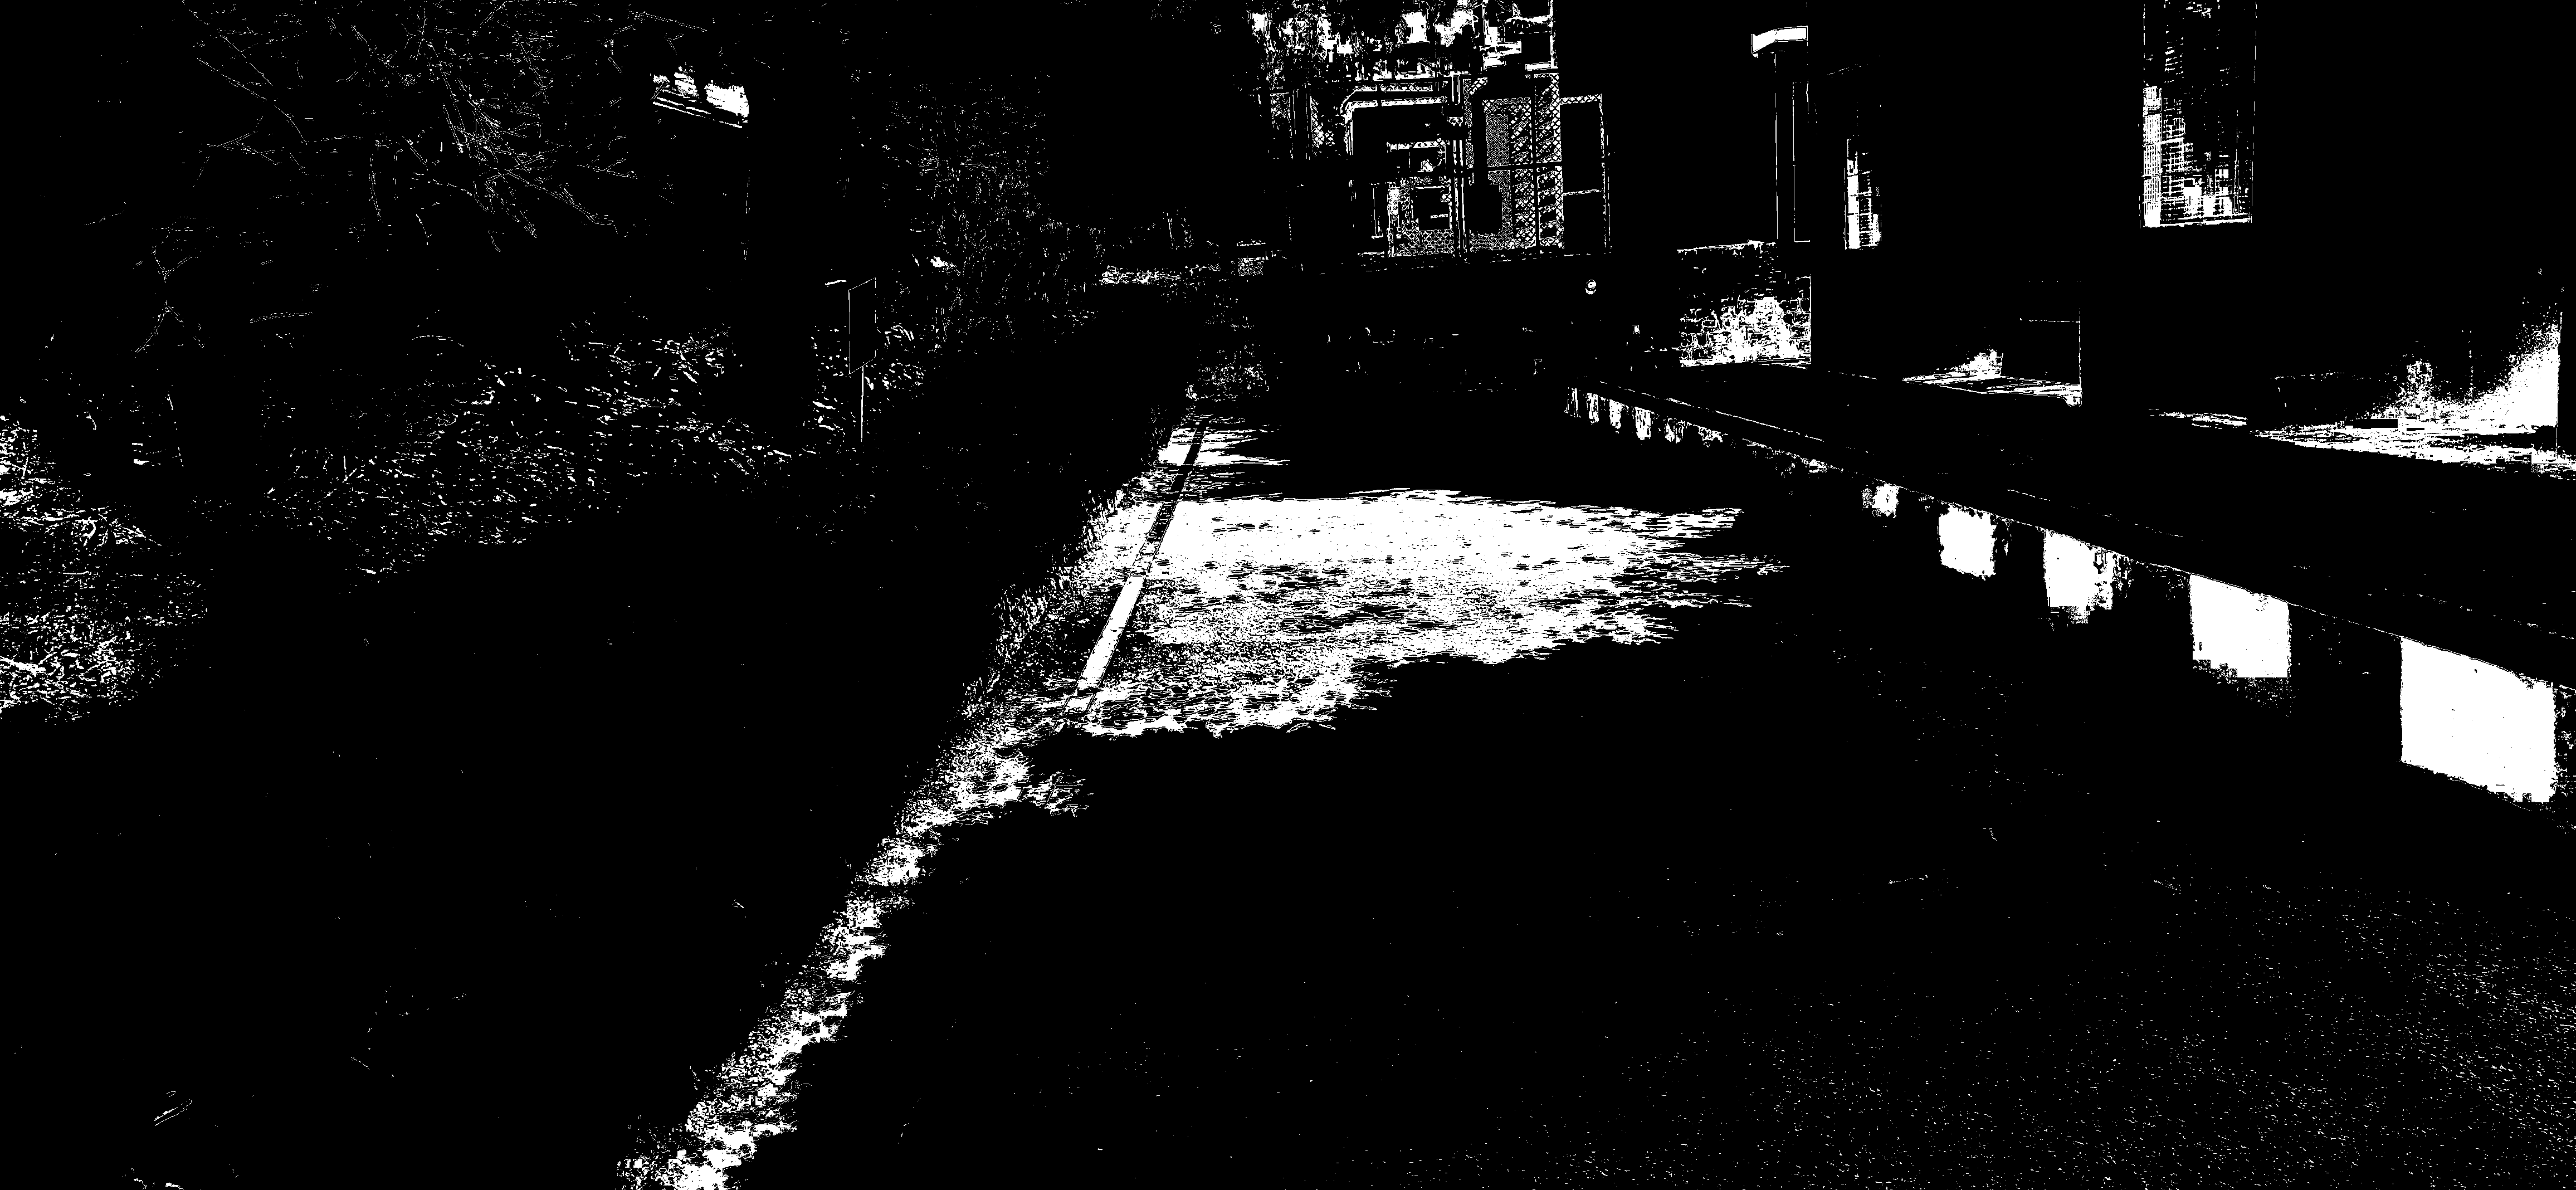

In [ ]:
height, width, channel = masked_image_lab.shape

masked_image = masked_image_lab.copy()
for i in range(height):
    for j in range(width):
        if masked_image_lab[i,j].sum() > 50:
            masked_image[i,j] = [255, 255, 255]

cv2_imshow(masked_image)

In [ ]:
# 173, 160, 149
# 168, 153, 136
# 121, 116, 110
# 201, 193, 176
# 171, 161, 149 best
height, width, channel = img.shape

result_image = img.copy()
for i in range(height):
    for j in range(width):
        if masked_image[i,j].sum() != 0:
            result_image[i,j] = [176 , 193, 201]

# cv2_imshow(img)
cv2_imshow(result_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def lighten_color_pixels(image, factor=3):
    # Split the image into its color channels (BGR)
    b, g, r = cv.split(image)

    # Lighten each channel by multiplying the intensity values
    b_lightened = np.clip(b * factor, 0, 255)
    g_lightened = np.clip(g * factor, 0, 255)
    r_lightened = np.clip(r * factor, 0, 255)

    # Merge the lightened channels back into the image
    lightened_image = cv.merge([b_lightened, g_lightened, r_lightened])

    return lightened_image

# Apply the lighten_color_pixels function
lightened_image = lighten_color_pixels(img)

# Display the original and lightened images
cv2_imshow(img)
cv2_imshow(lightened_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
height, width, channel = img.shape

result_image = img.copy()
for i in range(height):
    for j in range(width):
        if masked_image[i,j].sum() != 0:
            result_image[i,j] = lightened_image[i,j]

cv2_imshow(img)
cv2_imshow(result_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Blur image using Gaussian Blur method
blur_img = cv.GaussianBlur(brightened_image,(51,51),0)
cv2_imshow(blur_img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def preprocess_image(image):
    # Convert the image into RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Reshape the image into a 2D array of pixels and 3 colour values (RGB)
    pixel_values = image.reshape((-1,3))

    # Convert the pixel values into float
    return np.float32(pixel_values)

def perform_kmeans_clustering(pixel_values, k=3):
    # Perform k-means clustering on the pixels values
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    compactness, lables, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    return compactness, lables, np.uint8(centers)

def create_segmented_image(pixel_values, labels, centers, image):
    # Create a segmented image using the cluster centroids
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)

def create_masked_image(image, labels, cluster_to_disable):
    # Create a masked image by disabling a specific cluster
    masked_image = np.copy(image).reshape((-1,3))
    masked_image[labels.flatten() == cluster_to_disable] = [0,0,0]
    return masked_image.reshape(image.shape)

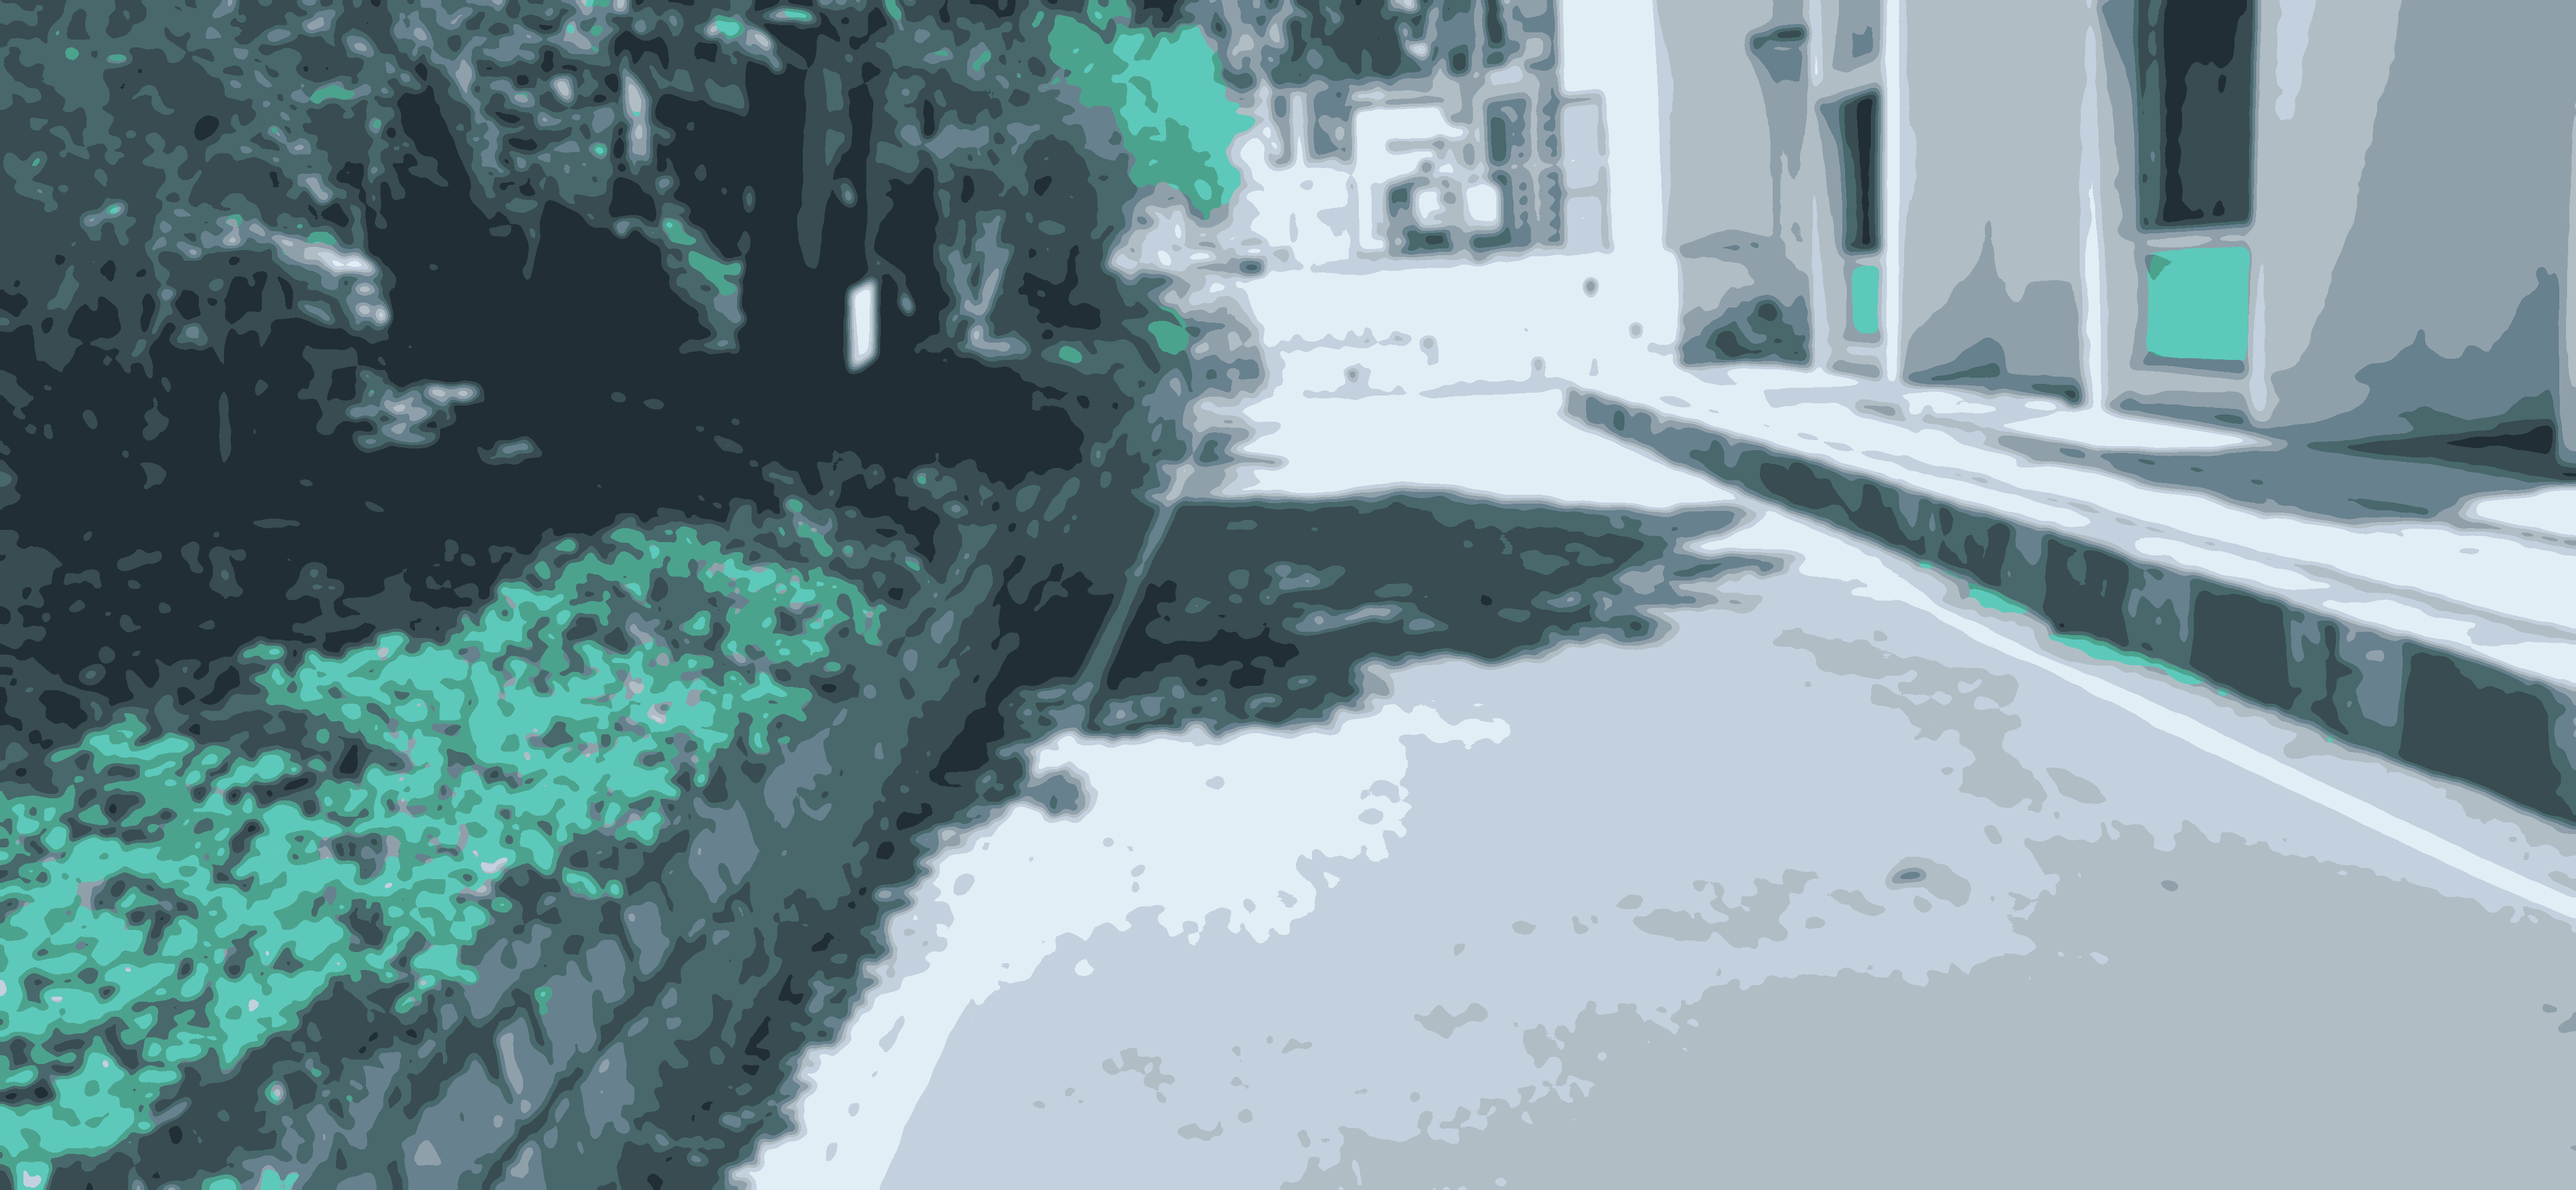

In [ ]:
# preprocess the image
pixel_values = preprocess_image(blur_img)

# compactness is the sum of squared distance from each point to their corresponding centers
compactness, labels, centers = perform_kmeans_clustering(pixel_values,10)

# create the segmented image
segmented_image = create_segmented_image(pixel_values, labels, centers, img)

# display the image
cv2_imshow(segmented_image)

In [ ]:
# disable only the cluster number 0 (turn the pixel into black)
cluster_to_disable =  0

# create the masked image
masked_image_0 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_0)

In [ ]:
# disable only the cluster number 1 (turn the pixel into black)
cluster_to_disable =  1

# create the masked image
masked_image_1 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
cluster_to_disable =  2

# create the masked image
masked_image_2 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 3 (turn the pixel into black)
cluster_to_disable =  3

# create the masked image
masked_image_3 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_3)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 4 (turn the pixel into black)
cluster_to_disable =  4

# create the masked image
masked_image_4 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_4)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 5 (turn the pixel into black)
cluster_to_disable =  5

# create the masked image
masked_image_5 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 6 (turn the pixel into black)
cluster_to_disable =  6

# create the masked image
masked_image_6 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_6)

In [ ]:
# disable only the cluster number 7 (turn the pixel into black)
cluster_to_disable =  7

# create the masked image
masked_image_7 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_7)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 8 (turn the pixel into black)
cluster_to_disable =  8

# create the masked image
masked_image_8 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_8)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 9 (turn the pixel into black)
cluster_to_disable =  9

# create the masked image
masked_image_9 = create_masked_image(img, labels, cluster_to_disable)
cv2_imshow(masked_image_9)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# # disable only the cluster number 10 (turn the pixel into black)
# cluster_to_disable =  10

# # create the masked image
# masked_image_10 = create_masked_image(img, labels, cluster_to_disable)
# cv2_imshow(masked_image_10)

In [ ]:
# # disable only the cluster number 11 (turn the pixel into black)
# cluster_to_disable =  11

# # create the masked image
# masked_image_11 = create_masked_image(img, labels, cluster_to_disable)
# cv2_imshow(masked_image_11)

In [ ]:
# # disable only the cluster number 12 (turn the pixel into black)
# cluster_to_disable =  12

# # create the masked image
# masked_image_12 = create_masked_image(img, labels, cluster_to_disable)
# cv2_imshow(masked_image_12)

In [ ]:
# # disable only the cluster number 13 (turn the pixel into black)
# cluster_to_disable =  13

# # create the masked image
# masked_image_13 = create_masked_image(img, labels, cluster_to_disable)
# cv2_imshow(masked_image_13)

In [ ]:
# # disable only the cluster number 14 (turn the pixel into black)
# cluster_to_disable =  14

# # create the masked image
# masked_image_14 = create_masked_image(img, labels, cluster_to_disable)
# cv2_imshow(masked_image_14)

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
cluster_to_disable_1 = 0
cluster_to_disable_2 = 3
cluster_to_disable_3 = 5
cluster_to_disable_4 = 6
cluster_to_disable_5 = 8
cluster_to_disable_6 = 9
# cluster_to_disable_7 = 8
# cluster_to_disable_8 = 9
# cluster_to_disable_9 = 7
# cluster_to_disable_10 = 9
# cluster_to_disable_11 = 8
# cluster_to_disable_12 = 9

# create the masked image
masked_image = create_masked_image(img, labels, cluster_to_disable_1)
masked_image = create_masked_image(masked_image, labels, cluster_to_disable_2)
masked_image = create_masked_image(masked_image, labels, cluster_to_disable_3)
masked_image = create_masked_image(masked_image, labels, cluster_to_disable_4)
masked_image = create_masked_image(masked_image, labels, cluster_to_disable_5)
masked_image = create_masked_image(masked_image, labels, cluster_to_disable_6)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_7)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_8)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_9)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_10)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_11)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_12)

cv2_imshow(masked_image)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
cluster_to_disable_1 = 1
cluster_to_disable_2 = 2
cluster_to_disable_3 = 4
cluster_to_disable_4 = 7
# cluster_to_disable_5 = 9
# cluster_to_disable_6 = 7
# cluster_to_disable_7 = 8
# cluster_to_disable_8 = 9

# create the masked image
masked_image_new = create_masked_image(img, labels, cluster_to_disable_1)
masked_image_new = create_masked_image(masked_image_new, labels, cluster_to_disable_2)
masked_image_new = create_masked_image(masked_image_new, labels, cluster_to_disable_3)
masked_image_new = create_masked_image(masked_image_new, labels, cluster_to_disable_4)
# masked_image_new = create_masked_image(masked_image_new, labels, cluster_to_disable_5)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_6)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_7)
# masked_image = create_masked_image(masked_image, labels, cluster_to_disable_8)

cv2_imshow(masked_image_new)

Output hidden; open in https://colab.research.google.com to view.

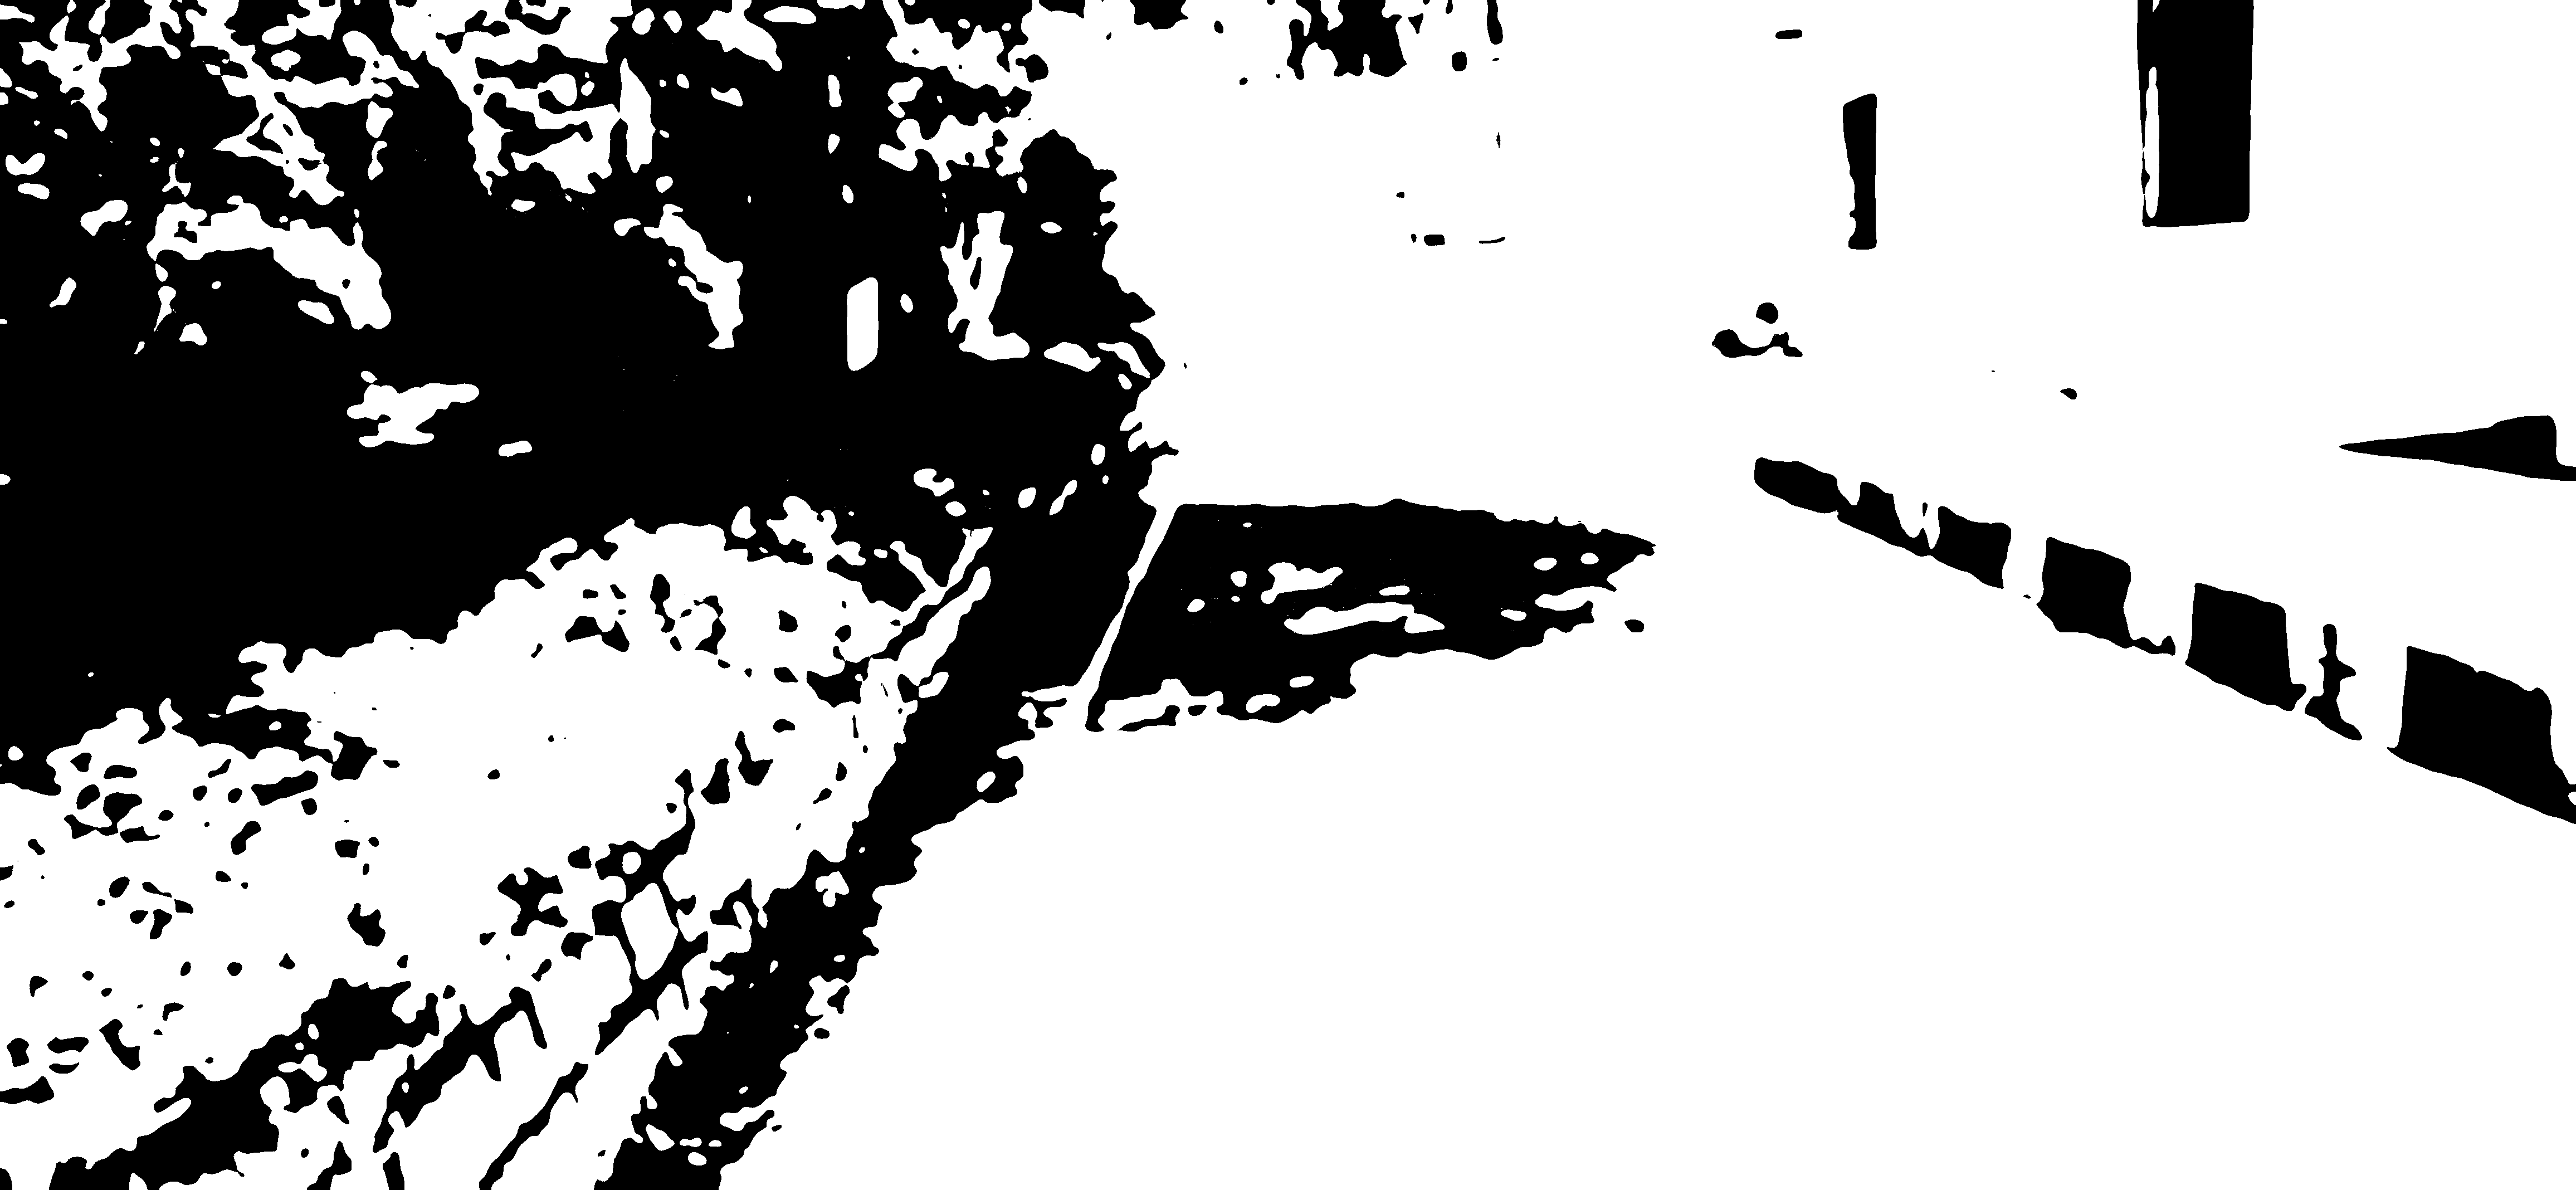

In [ ]:
# get the shape of the image
height, width = masked_image.shape[0], masked_image.shape[1]

damaged_img = masked_image

# Converting all pixels greater than zero to black while black becomes white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = 0
        else:
            damaged_img[i, j] = [255, 255, 255]

# saving the mask
mask = damaged_img

cv2_imshow(mask)

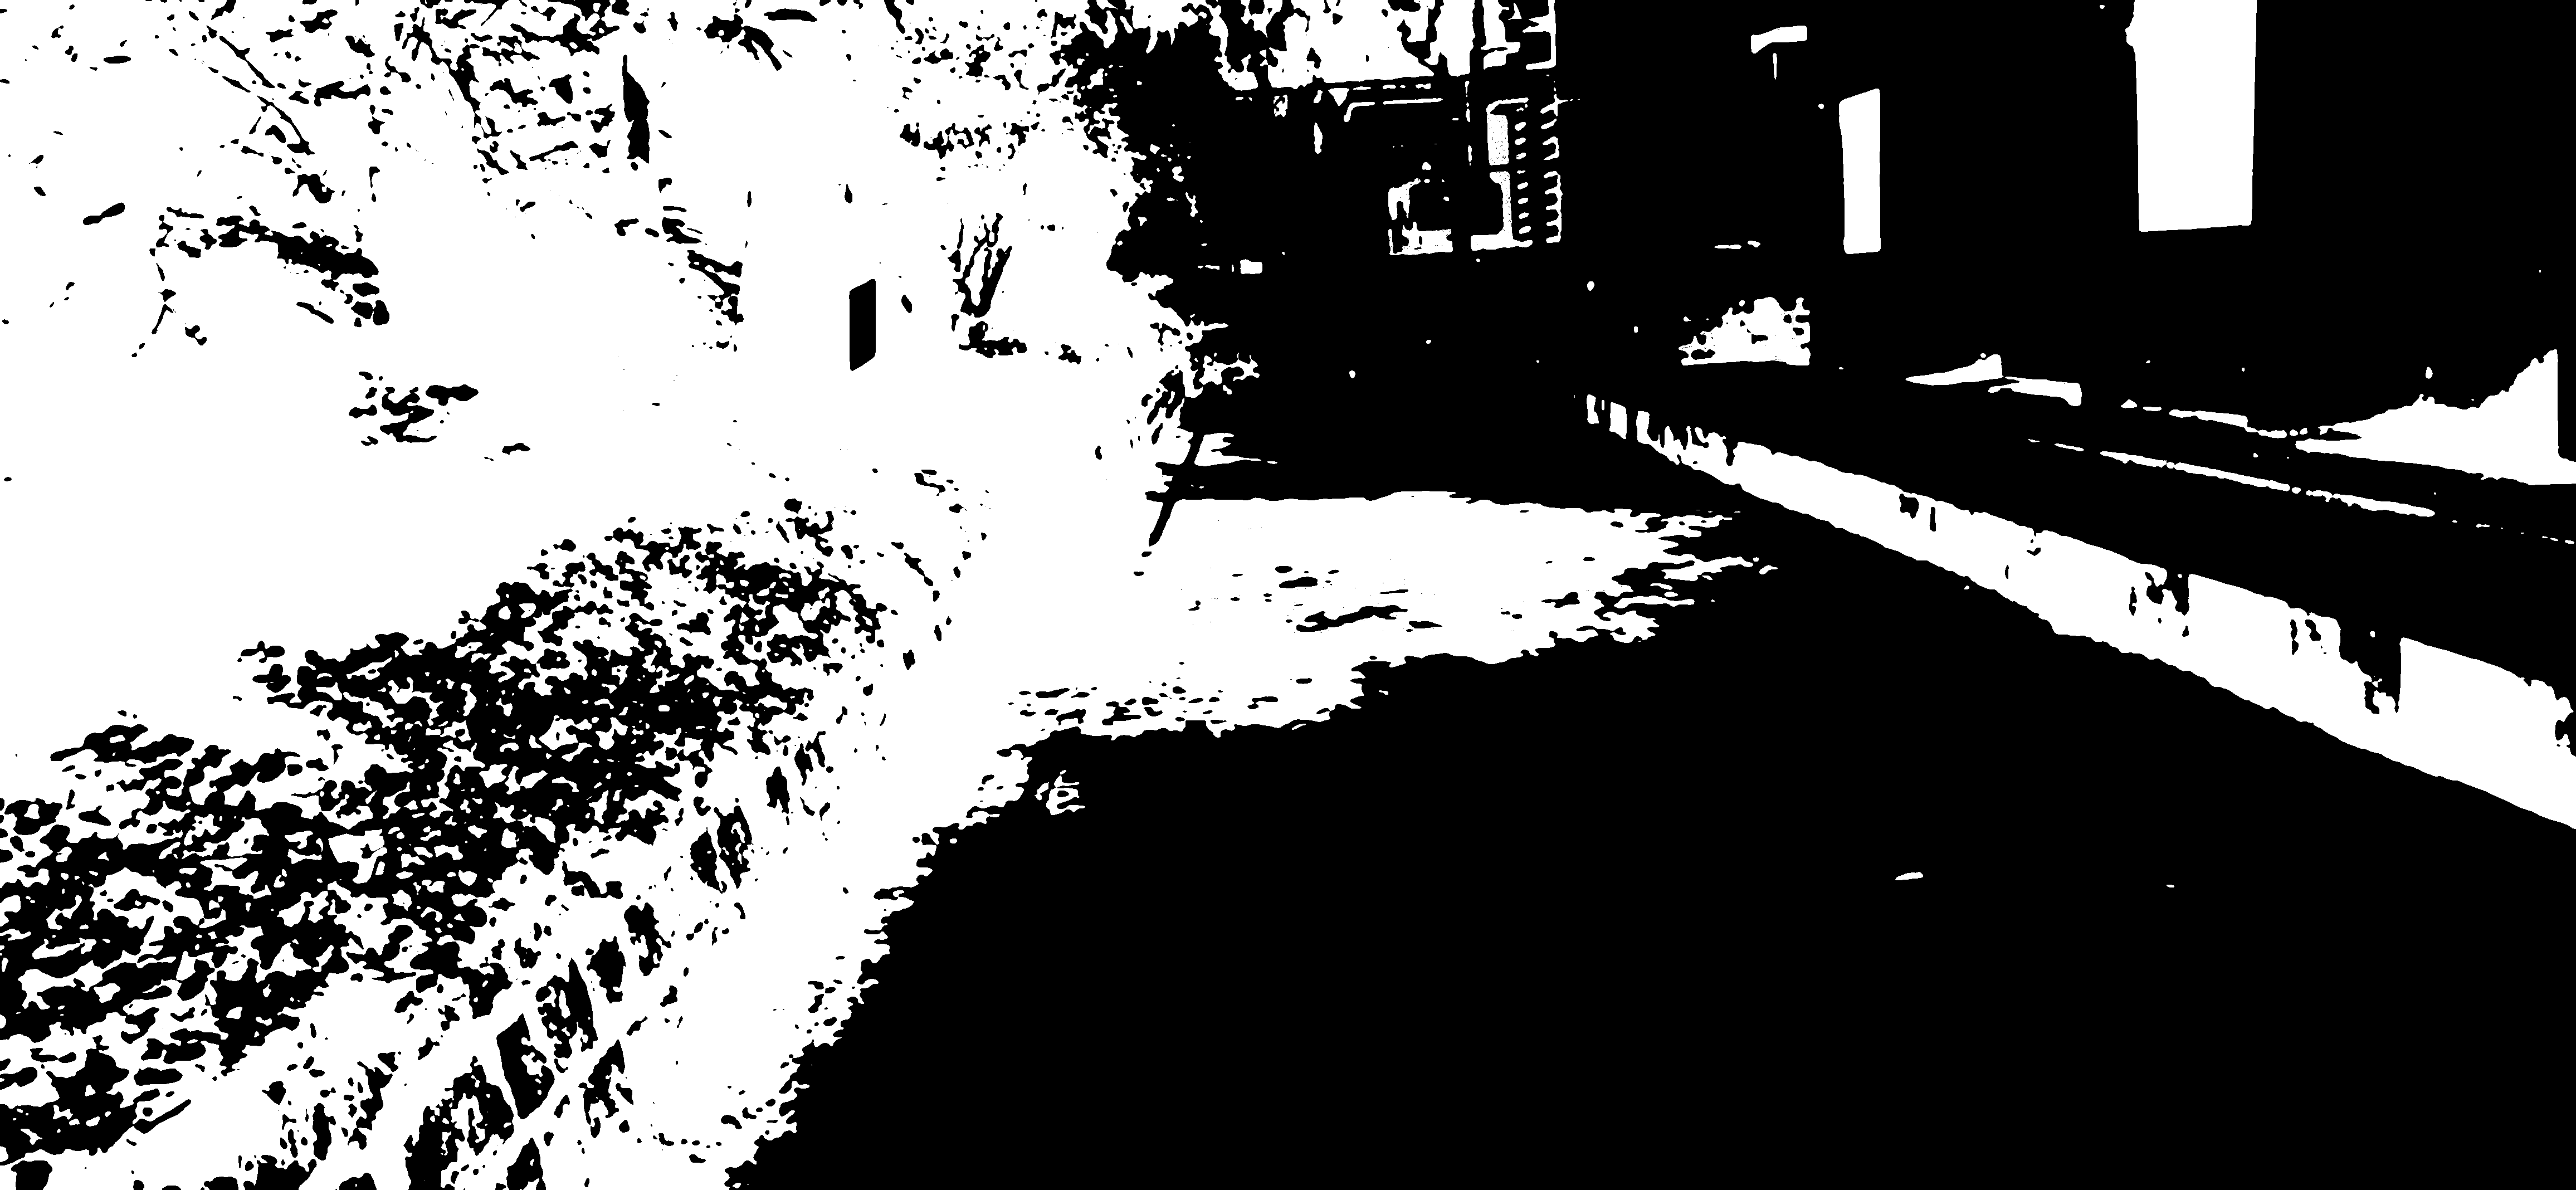

In [ ]:
# convert the image to grayscale
gray = cv.cvtColor(mask, cv.COLOR_BGRA2GRAY)

cv2_imshow(gray)